### **Model Training Report**

In this project, we trained two models, a Convolutional Neural Network (CNN) and a Long Short-Term Memory (LSTM) network, on our dataset to perform sentiment analysis.

In [121]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tf_keras.src.utils import pad_sequences
import matplotlib.pyplot as plt


# Read Dataset

In [11]:
data=pd.read_csv('C:\\Users\Othmane\Desktop\BDSaS S3\Sentiments Analysis\SentimentsAnalysis\data\IMDB Dataset.csv')

In [12]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [13]:
data.shape

(50000, 2)

In [15]:
data.isnull().sum()

review       0
sentiment    0
dtype: int64

<Axes: xlabel='sentiment', ylabel='count'>

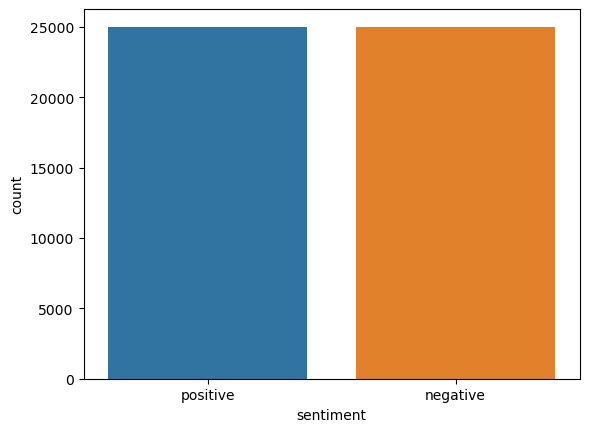

In [22]:
sns.countplot(data=data, x='sentiment')

# Data Preprocessing

### Remove tags from text , punctuations ,numbers,multiple spaces , character removal and Stopwords

In [27]:
Tag_re=re.compile(r'<[^>]+>')
def Removetags(text): 
    return Tag_re.sub('',text)

In [26]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Othmane\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [29]:

def preprocess(text): 
    sentence=text.lower()
    # Remove tags
    sentence=Removetags(sentence)
    # Remove Punctiations and numbers
    sentence=re.sub('[^a-zA-Z]', ' ', sentence)
    # Remove Single Character
    sentence=re.sub(r'\s+[a-zA-Z]\s+', ' ', sentence)
    # Remove Multiple Spaces
    sentence=re.sub(r'\s+', ' ', sentence)
    # Remove StopWords
    sentence=re.compile(r'\b('+r'|'.join(stopwords.words('english'))+r')\b\s*').sub('',sentence)
    return sentence
    

### Preprocessing the reviews

In [32]:
x=[]
Sentences=list(data['review'])
for sentence in Sentences:
    x.append(preprocess(sentence))

In [35]:
x[1]

'wonderful little production filming technique unassuming old time bbc fashion gives comforting sometimes discomforting sense realism entire piece actors extremely well chosen michael sheen got polari voices pat truly see seamless editing guided references williams diary entries well worth watching terrificly written performed piece masterful production one great master comedy life realism really comes home little things fantasy guard rather use traditional dream techniques remains solid disappears plays knowledge senses particularly scenes concerning orton halliwell sets particularly flat halliwell murals decorating every surface terribly well done '

### Preprocessing the Sentiments

In [38]:

y=np.array(list(map(lambda x:1 if x=='positive' else 0,data['sentiment'])))

In [39]:
y

array([1, 1, 1, ..., 0, 0, 0])

In [41]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [42]:
X_train[1]

'watch entire movie could watch entire movie stopped dvd watching half hour suggest anyone thinking watching stop taking disc case like mafia movies tragic comic corky romano described tragic attempt mafia comedy problem corky romano simply tries hard get audience laugh plot seems excuse moving chris kattan corky one scene another corky completely overplayed lacks subtlety credulity strange mannerisms come across contrived chris kattan clearly acting rather taking role bounces right story scene utterly predictable comedic event occur set obvious soon scene introduced comedies mr bean disasters caused title character funny empathise characters motivations initial event situation character ends telegraphed corky however gives feeling deliberately screwing desperate attempt draw laugh audience chris played alien character never really connects characters movie whose behaviour entirely inexplicable except trying draw laughs comedy scenes predictable stereotyped jokes seemed far familiar mo

In [43]:
y_train[1]

0

# Tokenization of X_train and X_test

In [45]:
word_tokenizer=Tokenizer()
word_tokenizer.fit_on_texts(X_train)

In [46]:
X_train=word_tokenizer.texts_to_sequences(X_train)
X_test=word_tokenizer.texts_to_sequences(X_test)

In [48]:
X_train[1]

[27,
 317,
 1,
 22,
 27,
 317,
 1,
 2116,
 148,
 54,
 188,
 395,
 1293,
 136,
 404,
 54,
 406,
 506,
 3453,
 290,
 4,
 3748,
 24,
 1480,
 611,
 11609,
 13005,
 1943,
 1480,
 461,
 3748,
 101,
 320,
 11609,
 13005,
 217,
 377,
 137,
 15,
 185,
 299,
 33,
 83,
 1216,
 569,
 1130,
 15681,
 11609,
 3,
 46,
 62,
 11609,
 219,
 11815,
 1343,
 3943,
 17437,
 533,
 6265,
 107,
 484,
 1919,
 1130,
 15681,
 562,
 37,
 140,
 506,
 110,
 13301,
 98,
 9,
 46,
 1146,
 574,
 1527,
 1426,
 3571,
 153,
 446,
 399,
 46,
 1547,
 1200,
 318,
 4471,
 8852,
 1946,
 294,
 28,
 60,
 19950,
 26,
 4554,
 2370,
 1426,
 734,
 28,
 514,
 13924,
 11609,
 88,
 286,
 423,
 4200,
 11393,
 1673,
 461,
 2270,
 299,
 185,
 1130,
 143,
 936,
 28,
 34,
 10,
 10489,
 26,
 1,
 503,
 4666,
 949,
 6602,
 418,
 150,
 2270,
 767,
 101,
 49,
 574,
 7018,
 479,
 334,
 116,
 919,
 1,
 22,
 1545,
 27]

In [61]:
word_tokenizer.word_index

{'movie': 1,
 'film': 2,
 'one': 3,
 'like': 4,
 'good': 5,
 'time': 6,
 'even': 7,
 'would': 8,
 'story': 9,
 'really': 10,
 'see': 11,
 'well': 12,
 'much': 13,
 'bad': 14,
 'get': 15,
 'people': 16,
 'great': 17,
 'also': 18,
 'first': 19,
 'made': 20,
 'make': 21,
 'could': 22,
 'way': 23,
 'movies': 24,
 'think': 25,
 'characters': 26,
 'watch': 27,
 'character': 28,
 'films': 29,
 'seen': 30,
 'two': 31,
 'many': 32,
 'plot': 33,
 'never': 34,
 'love': 35,
 'life': 36,
 'acting': 37,
 'best': 38,
 'know': 39,
 'show': 40,
 'little': 41,
 'ever': 42,
 'man': 43,
 'better': 44,
 'end': 45,
 'scene': 46,
 'still': 47,
 'say': 48,
 'scenes': 49,
 'something': 50,
 'go': 51,
 'back': 52,
 'real': 53,
 'watching': 54,
 'thing': 55,
 'actors': 56,
 'though': 57,
 'years': 58,
 'director': 59,
 'funny': 60,
 'old': 61,
 'another': 62,
 'actually': 63,
 'work': 64,
 'makes': 65,
 'nothing': 66,
 'look': 67,
 'going': 68,
 'find': 69,
 'lot': 70,
 'new': 71,
 'every': 72,
 'part': 73,
 'wo

In [62]:
vocab_length=len(word_tokenizer.word_index)
vocab_length

92393

In [52]:
X_train=pad_sequences(X_train, padding='post', maxlen=100)
X_test=pad_sequences(X_test, padding='post', maxlen=100)

In [55]:
X_train

array([[32471,   121,   100, ...,    96,   232,  3671],
       [  299,    33,    83, ...,    22,  1545,    27],
       [ 1173,    35,     9, ...,     0,     0,     0],
       ...,
       [  648,     3,   259, ...,     0,     0,     0],
       [  234,    78,   706, ...,     0,     0,     0],
       [  402,     1,   144, ...,     0,     0,     0]])

In [56]:
X_test

array([[   38, 40602,    42, ...,   154,    88,   839],
       [  276,  1064,   149, ...,   258,  8378,  7877],
       [    2,   774,   111, ...,     0,     0,     0],
       ...,
       [  303,   554, 24633, ...,   484,    74,  2792],
       [  116,    29,    51, ...,     0,     0,     0],
       [  105,  7918,    58, ...,     0,     0,     0]])

In [64]:
embeddings_dictionary=dict()
glove_file=open('C:\\Users\Othmane\Desktop\BDSaS S3\Sentiments Analysis\SentimentsAnalysis\data\\a2_glove.6B.100d.txt',encoding="utf-8")

# Word Embeddings

In [65]:
for line in glove_file:
    records = line.split()
    word = records[0]
    vector=np.asarray(records[1:], dtype='float32')
    embeddings_dictionary[word]=vector
glove_file.close()

### Create Embedding Matrix, Containing 100-Dimensional GloVe word embeddings

In [69]:
embedding_matrix=np.zeros((vocab_length+1,100))
for word, index in word_tokenizer.word_index.items():
    embedding_vect= embeddings_dictionary.get(word)
    if embedding_vect is not None:
        embedding_matrix[index]=embedding_vect

# Training Using CNN

In [126]:
from tensorflow.keras.layers import Dense, Embedding, GlobalMaxPooling1D,Conv1D,LSTM
from tensorflow.keras.models import Sequential


### Creating CNN Model

In [108]:
cnn_model=Sequential()

cnn_model.add(Embedding(
    input_dim=vocab_length + 1,     # Taille du vocabulaire
    output_dim=100,                # Dimension des vecteurs
    input_length=100,
    weights=[embedding_matrix],    # Poids de la matrice pré-entraînée
    trainable=False  # Geler les poids
))
cnn_model.add(Conv1D(filters=128,kernel_size=5,activation='relu'))
cnn_model.add(GlobalMaxPooling1D())
cnn_model.add(Dense(1,activation='sigmoid'))


C:\Users\Othmane\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [109]:
cnn_model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [110]:
print(cnn_model.summary())

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_10 (Embedding)        │ ?                      │     9,239,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_9 (Conv1D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d_6          │ ?                      │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,239,400 (35.25 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 9,239,400 (35.25 MB)

None


### Train the model on Train Data

In [111]:
cnn_history=cnn_model.fit(X_train,y_train,batch_size=128,epochs=10,verbose=1,validation_split=0.2,validation_data=(X_test,y_test))

Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 26s 62ms/step - accuracy: 0.7126 - loss: 0.5447 - val_accuracy: 0.8399 - val_loss: 0.3700
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 17s 55ms/step - accuracy: 0.8585 - loss: 0.3336 - val_accuracy: 0.8494 - val_loss: 0.3423
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 16s 50ms/step - accuracy: 0.8913 - loss: 0.2733 - val_accuracy: 0.8513 - val_loss: 0.3327
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 19s 61ms/step - accuracy: 0.9126 - loss: 0.2321 - val_accuracy: 0.8514 - val_loss: 0.3356
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 17s 53ms/step - accuracy: 0.9340 - loss: 0.1934 - val_accuracy: 0.8554 - val_loss: 0.3280
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 16s 50ms/step - accuracy: 0.9549 - loss: 0.1559 - val_accuracy: 0.8577 - val_loss: 0.3290
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 16s 52ms/step - accuracy: 0.9673 - loss: 0.1294 - val_accuracy: 0.8560 - val_loss: 0.3547
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 17s 55ms/step - accuracy: 0.9777 - loss: 0.1057 - 

### Evaluate the model on the Test Data

In [112]:
pred=cnn_model.evaluate(X_test,y_test,verbose=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8646 - loss: 0.3615


In [114]:
print('Test Accuracy:',pred[1])
print('Test Loss:',pred[0])

Test Accuracy: 0.8586999773979187
Test Loss: 0.36218634247779846


### Model Performance

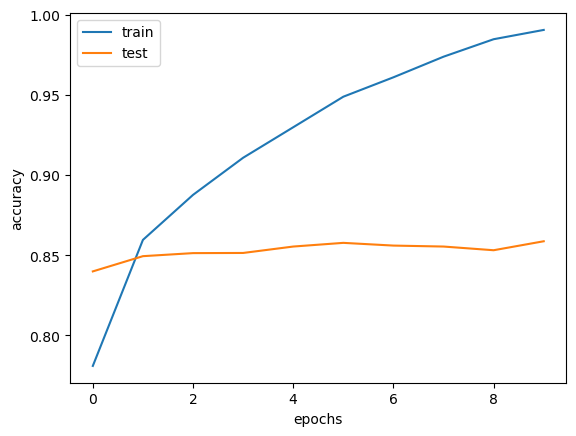

In [123]:
plt.plot(cnn_history.history['accuracy'])
plt.plot(cnn_history.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train','test'])
plt.show()

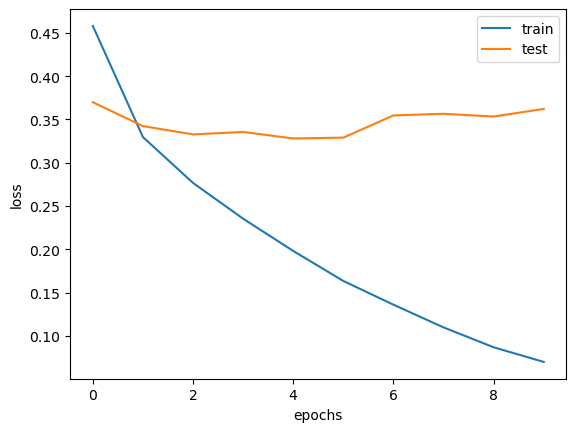

In [125]:
plt.plot(cnn_history.history['loss'])
plt.plot(cnn_history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train','test'])
plt.show()

# Training using LSTM

### Creating LSTM Model

In [127]:
lstm_model=Sequential()
lstm_model.add(Embedding(
    input_dim=vocab_length + 1,     # Taille du vocabulaire
    output_dim=100,                # Dimension des vecteurs
    input_length=100,
    weights=[embedding_matrix],    # Poids de la matrice pré-entraînée
    trainable=False                # Geler les poids
))
lstm_model.add(LSTM(128))
lstm_model.add(Dense(1,activation='sigmoid'))


C:\Users\Othmane\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [129]:
lstm_model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [130]:
lstm_model.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_11 (Embedding)        │ ?                      │     9,239,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,239,400 (35.25 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 9,239,400 (35.25 MB)

### Train on Test Data

In [132]:
lstm_history=lstm_model.fit(X_train,y_train,verbose=1,validation_data=(X_test,y_test),validation_split=0.2,batch_size=128,epochs=10)

Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 70s 213ms/step - accuracy: 0.6694 - loss: 0.5905 - val_accuracy: 0.7971 - val_loss: 0.4347
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 61s 196ms/step - accuracy: 0.8192 - loss: 0.4046 - val_accuracy: 0.8321 - val_loss: 0.3730
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 59s 189ms/step - accuracy: 0.8442 - loss: 0.3582 - val_accuracy: 0.8451 - val_loss: 0.3514
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 62s 198ms/step - accuracy: 0.8535 - loss: 0.3406 - val_accuracy: 0.8540 - val_loss: 0.3314
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 63s 202ms/step - accuracy: 0.8680 - loss: 0.3146 - val_accuracy: 0.8585 - val_loss: 0.3258
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 63s 202ms/step - accuracy: 0.8708 - loss: 0.3038 - val_accuracy: 0.8630 - val_loss: 0.3190
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 60s 191ms/step - accuracy: 0.8759 - loss: 0.2995 - val_accuracy: 0.8626 - val_loss: 0.3161
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 61s 195ms/step - accuracy: 0.8843 - loss: 0

### Evaluate on Test Data

In [133]:
pred=lstm_model.evaluate(X_test,y_test,verbose=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step - accuracy: 0.8630 - loss: 0.3222


In [134]:
print('Test Accuracy:',pred[1])
print('Test Loss:',pred[0])

Test Accuracy: 0.8634999990463257
Test Loss: 0.31819114089012146


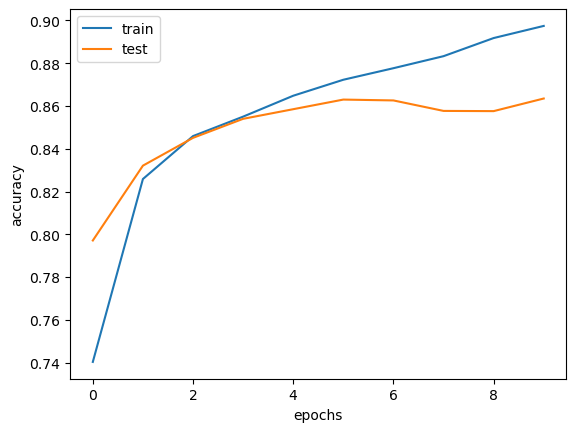

In [135]:
plt.plot(lstm_history.history['accuracy'])
plt.plot(lstm_history.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train','test'])
plt.show()

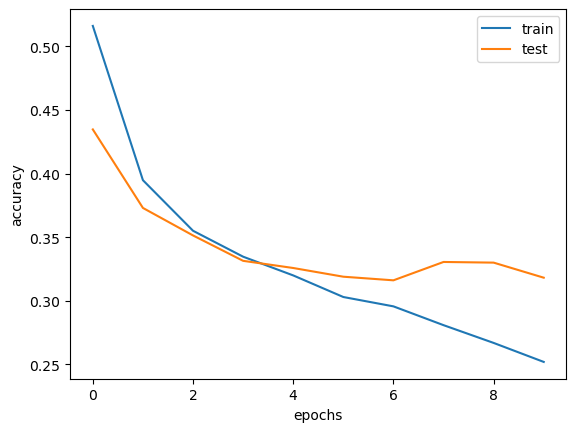

In [136]:
plt.plot(lstm_history.history['loss'])
plt.plot(lstm_history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train','test'])
plt.show()

In [139]:
lstm_model.save(f"C:\\Users\Othmane\Desktop\BDSaS S3\Sentiments Analysis\SentimentsAnalysis\models\lstm_model_sentiments_analysis.h5")

### **Model Training Report**

In this project, we trained two models, a Convolutional Neural Network (CNN) and a Long Short-Term Memory (LSTM) network, on our dataset to perform sentiment analysis. Below is a detailed summary of our observations:

---

#### **1. CNN Model**
- **Architecture**: The CNN model utilized an embedding layer, followed by a 1D convolutional layer, global max pooling, and a dense output layer.
- **Performance**: 
  - During training, the CNN model achieved high accuracy on the training set.
  - However, we observed significant overfitting, as the performance on the validation set did not improve and started to degrade. This indicates that the model was unable to generalize well to unseen data, potentially due to its reliance on localized patterns in the data.

---

#### **2. LSTM Model**
- **Architecture**: The LSTM model included an embedding layer, followed by an LSTM layer and a dense output layer.
- **Performance**: 
  - The LSTM model demonstrated better generalization compared to the CNN.
  - While training and validation performance were closely aligned, it showed lower risk of overfitting due to its ability to capture sequential dependencies and long-term relationships in the data.

---

#### **Conclusion**
Based on these observations, we decided to proceed with the **LSTM model** for predictions, as it handles the sequential nature of the dataset more effectively and avoids the overfitting issue encountered in the CNN model. This choice ensures better performance and generalization to new, unseen data.

# Predict Some Reviews

In [152]:
reviews=pd.read_csv("C:\\Users\Othmane\Desktop\BDSaS S3\Sentiments Analysis\SentimentsAnalysis\data\IMDb_Reviews_without_Sentiments.csv")

In [163]:
reviews.head(6)

,Unnamed: 0,Movie,Review Text,IMDb Rating
0,0,Ex Machina,"Intelligent Movie.\nThis movie is obviously allegorical, a fascinating tale about AI, but it is mainly about manipulation and power. It isn't for those wanting action or spectacular CGI, the movie is aimed at people who like to think, rather than passively wait to be entertained. There are themes here not only about AI, but also about surveillance, with excellent points about how data about us is collected by phone companies, search engine companies, commercial operating systems makers and so on. The plot seems simple but isn't, it's extremely clever, with the protagonist playing games, trying to stay one step ahead of one another. This is a movie with perfectly consistent internal logic that plays out perfectly. Don't go in expecting too much, however, as I can see most people will not be satisfied by this movie, but for me, it does what it sets out to do brilliantly. Therefore I give at least 9/10. And most recent movies have been getting 5/10 from me. This movie succeeds where another recent movie about AI, Transcendence, I think it is called, failed (but it was an interesting failure). A third movie about AI, a Spanish movie called Eva, was also brilliant. Eva was more moving and this movie more philosophical. But both movies were perfect in their different ways. The AI's name in this movie, Ava, seems to be a nod to the title of the Spanish movie. As an aside, it's nice that no ""stars"" appeared in ""Ex Machina"" and ""Eva"", the casting was great. Of course there are several aspects of this movie that are unrealistic and often absurd. But because this is an allegorical movie, these are acceptable, because the movie is making points, rather than striving for realism. It's more of a fairytale than accurate portrayal.",9
1,1,Ex Machina,"Extraordinary and thought-provoking.\n'Ex machina' is surprisingly dense, more so than other titles Alex Garland has written, perhaps excepting only 'Annihilation.' The simple concept is given a definite narrative, but that narrative pointedly explores the very nature of thought, and perception, and further broaching the nature and ramifications of morality. This is a psychological thriller, and in fundamental construction and in minute rendering alike, it is more intense than any other feature in the genre that I can name offhand, so much so as to almost classify as horror. The movie emphasizes and plays on dire uncertainty of intent, motivation, and reality all the way through to the climax, and even then leaves us with a somewhat ambiguous ending. And from ordinary beginning to captivating ending, at every point 'Ex machina' is absolutely marvelous.\n\nOf any performance I've seen from Oscar Isaac, none have been nearly so forceful as his portrayal of Nathan, exhibiting outstanding nuance and sharp personality in the realization of a man exceptionally intelligent, and exceptionally cruel and conniving. I'm not especially familiar with Domhnall Gleeson, but the Irish actor demonstrates admirable range and poise readily matching the same traits that are more immediately notable in his costars. And with that said - certainly not to count out anyone else involved - Alicia Vikander is phenomenal as Ava, showing a careful exactness to every motion and expression befitting the character, and impressing with her skills in the most subtle of ways.\n\nI love the score composed between Ben Salisbury and Geoff Barrow, lending to the pensive unease about the film and building to a great crescendo at the precise appropriate moments. The sound design is exquisite - soft and unobtrusive, and with those qualities denoting both the meticulous craft of the feature, and the highly advanced status of Ava. So it is, too, with the special effects; to read a little bit of the production history informs of the substantial effort made to ensure every element of Nathan's creation was visualized with the utmost possibility of realism. And I think that endeav

In [148]:
reviews.shape

(6, 4)

In [154]:
reviews_text=reviews['Review Text']
reviews_preprocessed=[]
for review in reviews_text:
    review=preprocess(review)
    reviews_preprocessed.append(review)
    

In [156]:
reviews_tokenized=word_tokenizer.texts_to_sequences(reviews_preprocessed)

In [159]:
reviews_tokenized[1]

[2273,
 87,
 2421,
 1040,
 14943,
 1090,
 10378,
 2494,
 1850,
 5915,
 281,
 262,
 23889,
 22535,
 463,
 978,
 238,
 3479,
 1189,
 1189,
 25409,
 5280,
 743,
 87,
 6325,
 86112,
 743,
 17802,
 3702,
 1842,
 556,
 8178,
 4576,
 643,
 7060,
 3071,
 1350,
 636,
 382,
 261,
 23467,
 13,
 108,
 13083,
 80,
 1,
 17003,
 191,
 3809,
 10219,
 3303,
 3133,
 491,
 23,
 1204,
 7,
 750,
 76,
 528,
 5081,
 154,
 1698,
 328,
 3928,
 154,
 72,
 109,
 1040,
 14943,
 301,
 3082,
 129,
 30,
 664,
 13617,
 486,
 649,
 18339,
 937,
 6730,
 21297,
 1227,
 8614,
 2196,
 1478,
 5756,
 43,
 4741,
 925,
 4741,
 2210,
 8766,
 149,
 919,
 22318,
 2374,
 168,
 5072,
 5765,
 1858,
 27237,
 7227,
 9940,
 5611,
 1049,
 2761,
 24288,
 190,
 298,
 1332,
 136,
 209,
 442,
 7891,
 5671,
 12806,
 623,
 3996,
 72,
 1149,
 2443,
 19362,
 28,
 14513,
 1884,
 1125,
 624,
 35,
 428,
 3948,
 1021,
 44870,
 19793,
 42677,
 17382,
 19255,
 14277,
 2,
 1179,
 17,
 21253,
 7001,
 2208,
 265,
 313,
 1523,
 5769,
 1550,
 17006,
 214

In [157]:
reviews_padding=pad_sequences(reviews_tokenized,padding='post',maxlen=100)

In [160]:
reviews_padding[1]

array([  121,   234,   352,  8844,  6752,   630,    20,  6507,    72,
        1400,  6730,  2885, 24074, 10547,  3633,  1645,    25, 11701,
        1335, 19425,    26,   281,  1574,  1143,   288, 13706,  5915,
          46,   356,  7483,  1594,  5291,    48,    66,   322,  1189,
       10076,  1121,   609,   365,     7,  1710,  8422,   636,  9825,
         125,   604,  5314,   139,   387,  1623,    27,    86,   116,
       10174,   123,  3709,   539,  8938,   130,  8072,   958,     9,
         863, 13650,   699,   692,    29,  4716,  1583,  5915,   771,
       33051,  5853,   968, 30802, 27471,  7237,   382,   314,   792,
       13216,  1622, 10662,  2044,   313,   244,   199,   100,  1040,
       14943,  5245,    19,   808,  4902,   922,  1023,   522,    96,
          11])

In [161]:
sentiment=lstm_model.predict(reviews_padding)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


In [166]:
sentiment

array([[0.9761044 ],
       [0.9960453 ],
       [0.1434015 ],
       [0.07679168],
       [0.9943406 ],
       [0.01891654]], dtype=float32)

In [167]:
reviews['Predicted Sentiments']= ['positive' if v > 0.5 else 'negative' for v in sentiment]

In [168]:
reviews.head(6)

,Unnamed: 0,Movie,Review Text,IMDb Rating,Predicted Sentiments
0,0,Ex Machina,"Intelligent Movie.\nThis movie is obviously allegorical, a fascinating tale about AI, but it is mainly about manipulation and power. It isn't for those wanting action or spectacular CGI, the movie is aimed at people who like to think, rather than passively wait to be entertained. There are themes here not only about AI, but also about surveillance, with excellent points about how data about us is collected by phone companies, search engine companies, commercial operating systems makers and so on. The plot seems simple but isn't, it's extremely clever, with the protagonist playing games, trying to stay one step ahead of one another. This is a movie with perfectly consistent internal logic that plays out perfectly. Don't go in expecting too much, however, as I can see most people will not be satisfied by this movie, but for me, it does what it sets out to do brilliantly. Therefore I give at least 9/10. And most recent movies have been getting 5/10 from me. This movie succeeds where another recent movie about AI, Transcendence, I think it is called, failed (but it was an interesting failure). A third movie about AI, a Spanish movie called Eva, was also brilliant. Eva was more moving and this movie more philosophical. But both movies were perfect in their different ways. The AI's name in this movie, Ava, seems to be a nod to the title of the Spanish movie. As an aside, it's nice that no ""stars"" appeared in ""Ex Machina"" and ""Eva"", the casting was great. Of course there are several aspects of this movie that are unrealistic and often absurd. But because this is an allegorical movie, these are acceptable, because the movie is making points, rather than striving for realism. It's more of a fairytale than accurate portrayal.",9,positive
1,1,Ex Machina,"Extraordinary and thought-provoking.\n'Ex machina' is surprisingly dense, more so than other titles Alex Garland has written, perhaps excepting only 'Annihilation.' The simple concept is given a definite narrative, but that narrative pointedly explores the very nature of thought, and perception, and further broaching the nature and ramifications of morality. This is a psychological thriller, and in fundamental construction and in minute rendering alike, it is more intense than any other feature in the genre that I can name offhand, so much so as to almost classify as horror. The movie emphasizes and plays on dire uncertainty of intent, motivation, and reality all the way through to the climax, and even then leaves us with a somewhat ambiguous ending. And from ordinary beginning to captivating ending, at every point 'Ex machina' is absolutely marvelous.\n\nOf any performance I've seen from Oscar Isaac, none have been nearly so forceful as his portrayal of Nathan, exhibiting outstanding nuance and sharp personality in the realization of a man exceptionally intelligent, and exceptionally cruel and conniving. I'm not especially familiar with Domhnall Gleeson, but the Irish actor demonstrates admirable range and poise readily matching the same traits that are more immediately notable in his costars. And with that said - certainly not to count out anyone else involved - Alicia Vikander is phenomenal as Ava, showing a careful exactness to every motion and expression befitting the character, and impressing with her skills in the most subtle of ways.\n\nI love the score composed between Ben Salisbury and Geoff Barrow, lending to the pensive unease about the film and building to a great crescendo at the precise appropriate moments. The sound design is exquisite - soft and unobtrusive, and with those qualities denoting both the meticulous craft of the feature, and the highly advanced status of Ava. So it is, too, with the special effects; to read a little bit of the production history informs of the substantial effort made to ensure every element of Nathan's creation was visualized with the utmost possibility of re